# **데이터 크롤링**

## **크롤링이란?**
> 크롤러(crawler)는 자동화된 방법으로 웹을 탐색하는 컴퓨터 프로그램  
'웹 크롤링'(web crawling)??  
'데이터 크롤링'(data crawling)!!  

우리는 매일 크롤러도 사용하고 있습니다.  
ex) google, yahoo, naver 등 검색 엔진

## **웹 크롤링**
> 웹 서비스 내 정보를 수집하는 일

>> 필요한 정보가 있다면?  
API 확인 -> 없으면 직접 크롤링  
    
> 다만 서비스 제공자의 입장에서는??

### 웹 서핑을 하는 의식의 흐름
> - 브라우저 오픈  
> - 원하는 인터넷페이지 주소 입력  
> - 화면이 열리면 찾고자 하는 정보를 스크롤 하면서 찾기  
> - 문자, 그림, 동영상 조회  

### 웹 크롤링 하는 의식의 흐름
> - 정보를 가져오고자 하는 url 정의
> - url 정보로 requests로 정보 요청
> - text 정보를 html로 변환
> - html에서 우리가 필요한 정보만 선별

### 웹 크롤링을 위해 BeautifulSoup 사용
> - requests는 요청을 받기는 하지만 text로만 받음  
> - API는 통신을 위해 정형화 된 데이터 형태의 text  
> - 우리가 원하는 데이터로 가공하기 위해 편의상 html로 변환  
> - text를 html로 변환하는 모듈이 beautifulSoup

### 간단한 데이터 크롤링으로 기본 개념잡기

In [1]:
# 필요패키지 import
import numpy as np
import pandas as pd
import requests # 크롤링에 사용하는 패키지
from bs4 import BeautifulSoup # html 변환에 사용함

#### 네이버 메인페이지 크롤링

In [2]:
# !pip install beautifulsoup4
# !pip install requests

[<img alt="" height="49" src="https://static-whale.pstatic.net/main/img_mousegesture_v2@2x.png" style="padding-left: 90px" width="200"/>,
 <img alt="중앙일보" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/up/2021/0824/nsd115034872.png"/>,
 <img alt="뉴데일리" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/327.png"/>,
 <img alt="뉴시스" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/003.png"/>,
 <img alt="한국경제" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/015.png"/>,
 <img alt="국민일보" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/005.png"/>,
 <img alt="파이낸셜뉴스" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/014.png"/>,
 <img alt="일간스포츠" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/241
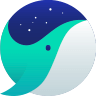
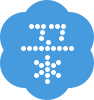

In [13]:
'''
정보를 가져오고자 하는 url 정의
url 정보로 reguests로 정보 요청
text 정보를 html로 변환
html에서 우리가 필요한 정보만 요청
'''
# 네이버 메인페이지
# url정의(문자열 형식으로 전달,http:// 포함)
url = 'https://www.naver.com'
# requsts로 url에 정보요청
# requests 파이썬이 컴퓨터간 통신체계에 해당하는 명령어들을 사용하도록 만든 패키지
# 해당코드를 실행시키는 순간 서비스제공자에게 정보요청을 함.
resp = requests.get(url)

# 정보를 html 변환 (보기 쉽게)
resp.text
html = BeautifulSoup(resp.text, 'html.parser')
# html 내에서 우리가 보고 싶은 정보만 선별
html.select('img')

#### 다음 뉴스페이지 크롤링

In [23]:
# 다음 뉴스 페이지 크롤링
# url정의
url = 'https://news.daum.net/'
# requsts로 url에 정보요청
resp = requests.get(url)
# 정보를 html 변환 (보기 쉽게)
html = BeautifulSoup(resp.text, 'html.parser')
# html 내에서 뉴스헤더 선별
html.select('a.link_txt')[0].text.strip()

'美, \'푸틴 연인\'에 제재 막판 보류.."우크라 협상 긴장 우려"'

In [28]:
for news in html.select('a.link_txt')[:-13]:
    print(news.text.strip().replace('[','').replace(']',''))

美, '푸틴 연인'에 제재 막판 보류.."우크라 협상 긴장 우려"
"마크롱 재선 성공..佛 원전·반도체시장 더 커진다"-코트라
레바논서 이스라엘 향해 로켓포 두 발 발사..긴장 확산 우려
이차영 괴산군수 재선 도전 "행정 연속성 중요"
ICT업계 "새 정부 '과학기술수석비서관' 설치해 달라"
태안 해상서 코카인 101kg 적발기법 등 3건 인터폴 정보 공유·
변동장에 한탕 노린 투기자금..헤지펀드 자금 유입 7년만에 최대
달고나·건빵·누룽지..'이게 맛있니?'  옛날과자 250만개 팔렸다
이 길로는 못보내..러 보급열차 훼방한 벨라루스 근로자들우크라 침공
中 "왜 미국만 지구를 구해? 우리도 한다!"과학을읽다
인수위 "코로나 후유증 대책 추진.. 감염병등급 상향 논의 없어 "
공포의 바이오株, 외국인도 수백억 물렸다..급락하는 HLB‧휴마시스‧바이오니아
車시트에 앉는 순간 '토털케어' 시작된다
인수위, 코로나 100일 프로젝트·종합방역대책 오늘 확정..安 27일 직접 발표
검수완박 강타에..'오직 민생' 거리두던 尹당선인도 침묵깨나
먹는 코로나약 팍스로비드, 美서도 "제대로 활용 못한다"
김오수 "국회의장 중재안 전혀 알지 못했다..중재안의 '중'자도 못들어"
'백신 반대' 日정치인, 여중생 임신·출산시켜 논란
권은희 제명안 부결..국힘 이름 달고 '검수완박' 찬성하나
인수위 "코로나 감염병 등급 재상향 검토 안해..27일 새정부 방역대책 발표"
지구촌 돋보기 세계 펭귄의 날
中 "왜 미국만 지구를 구해? 우리도 한다!"과학을읽다
현장영상+ 김오수 "중재안, 검수완박 시행시기만 잠시 늦춘 것에 불과"
뉴스라이브 이준석 "검수완박 합의 재검토"..'뒤집기' 시도?
입술 깨물며 안절부절..'푸틴 건강 이상' 의심되는 영상 또 나와
인터뷰대검 넘버3 "검수완박 너무 걱정돼.. 공청회라도 열라"
뉴스킹 '미리 보는' 한덕수 인사청문회..'론스타'부터 '임대왕'까지 6가지 법리적 쟁점
유형재의 새록새록 귀향 않고 경포에 머물던 백조의 안타까운 소식
주변의 정겨운 풍경들

'가덕도 신공항, 개발 착수.."환경 고려" 제주2공항 속도 조절'

### 실제 개발자가 작성한 코드로 확인된다
> 정제되지 않은 데이터로 가독성이 좋지 않음  
우리는 이 중에서 우리가 원하는 정보를 선별해서 가져오는 작업을 진행합니다.  
그러기에 html의 기본 구성을 살펴보도록 하겠습니다.  

#### 웹 페이지의 구성
> **HTML(Hyper Text Markup Language)**  
www 를 구성하는데 사용하는 국제표준 언어로서 컨텐츠와 레이아웃을 담고 있다

> **<태그>** 내용 **</태그>**  
<tag이름 class="class이름1 class이름2" id="주민번호" href="주소"></tag이름>

> 형태나 속성을 묘사하기 위한 구조적 언어 : HTML, CSS (계층이 있음)  
웹의 작동 및 제어를 위한 프로그래밍 언어 :  Js

#### 셀렉터
> 용도 : html에서 내가 원하는 내용을 찾아내기 위해서
```
tag : span  
class(별명, 그룹명) : .news
<span class="news" id="1234">비비고 왕교자</span>
<span class="product" id="1235">비비고 볶음밥</span>
```
>> 단일 셀렉터  
html.select('span')  # 태그 이름이 span인 친구들을 다 들고옴  
```
<span class="news" id="1234">비비고 왕교자</span>
<span class="product" id="1235">비비고 볶음밥</span>
```


>> 클래스 포함 셀렉터
html.select('span.news')
```
<span class="news" id="1234">비비고 왕교자</span>
```

>> id 포함 셀렉터
id(고유값) : #1235
```
<span class="product" id="1235">비비고 볶음밥</span>
```
html.select('span#1234')

#### 복합 셀렉터
    1. 조합 셀렉터
    <span>1</span>
    <span class="txt">2</span>
    <em class="txt">3</em>
    <li id="name"></li>
    
    태그 이름이 span이고 클래스 이름은 txt인 라인을 찾고 싶다. : span.txt 
    li 태그 중에서 id가 name 인 라인을 찾고\ 싶다. : li#name

    2. 경로 셀렉터
    
    <ul>
        <li><span>이걸 찾으려면?</span></li>
    </ul>
    <span>이건 아님</span>

    ul 태그안 li 태그 안 span 라인을 찾는다
    ul > li > span 혹은 ul li span

In [61]:
import time

In [66]:
# 슬의생, 도깨비, 오징어게임
# 슬의생 드라마소개 크롤링
# url정의
li = ['도깨비','천국의계단']
for i in li:
    time.sleep(2)
    url = f'https://search.naver.com/search.naver?sm=tab_hty.top&where=nexearch&query={i}'
    # requsts로 url에 정보요청
    resp = requests.get(url)
    # 정보를 html 변환 (보기 쉽게)
    html = BeautifulSoup(resp.text, 'html.parser')
    # html 내에서 데이터
    print(i, html.select('span.desc._text')[0].text)

도깨비 불멸의 삶을 끝내기 위해 인간 신부가 필요한 도깨비, 그와 기묘한 동거를 시작한 기억상실증 저승사자. 그런 그들 앞에 '도깨비 신부'라 주장하는 '죽었어야 할 운명'의 소녀가 나타나며 벌어지는 신비로운 낭만 설화
천국의계단 금지된, 이루어질 수 없는 사랑에 몸부림치는 네 남녀의 영원히 끝나지 않을 사랑 이야기를 그린 드라마


In [ ]:
# 해당 드라마 뉴스 제목 크롤링


## 다음에서 로또번호 가져오기

In [72]:
# url 설정
url = 'https://search.daum.net/search?w=tot&DA=YZR&t__nil_searchbox=btn&sug=&sugo=&sq=&o=&q=%EB%A1%9C%EB%98%90%EB%B2%88%ED%98%B8'
# requests로 데이터 요청하기
resp = requests.get(url)
# html로 변환
html = BeautifulSoup(resp.text, 'html.parser')
# 데이터 선별
html.select('div.lottonum')[0].text

' 5 11 18 20 35 45 보너스 3 '

In [71]:
# url 설정
url = 'https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=%EB%A1%9C%EB%98%90%EB%B2%88%ED%98%B8'
# requests로 데이터 요청하기
resp = requests.get(url)
# html로 변환
html = BeautifulSoup(resp.text, 'html.parser')
# 데이터 선별
for ball_nm in html.select('span.ball'):
    print(ball_nm.text)

5
11
18
20
35
45
3


## 다음에서 로또번호 가져와 볼께요 몽땅 다 가져옵니다

In [67]:
# 차단막는 코드
seed = np.random.randint(100)
np.random.seed(seed)
a = np.random.randint(5)
time.sleep(a)


4

In [85]:
# url 설정
url = 'https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=%EB%A1%9C%EB%98%90%EB%B2%88%ED%98%B8'
# requests로 데이터 요청하기
resp = requests.get(url)
# html로 변환
html = BeautifulSoup(resp.text, 'html.parser')
# 데이터 선별
for ball in html.select('span.ball')[:6]:
    print(int(ball.text))

5
11
18
20
35
45
3


In [87]:
# url 설정
lot_list = []
for i in range(1013)[-30:]:
    time.sleep(a)
    url = f'https://search.naver.com/search.naver?where=nexearch&sm=tab_etc&qvt=0&query={i}%ED%9A%8C%20%EB%A1%9C%EB%98%90%EB%8B%B9%EC%B2%A8%EB%B2%88%ED%98%B8'
    # requsts로 url에 정보요청
    resp = requests.get(url)
    # 정보를 html 변환 (보기 쉽게)
    html = BeautifulSoup(resp.text, 'html.parser')
    # html 내에서 데이터
    print(f"{i}회차",html.select('div.winning_number')[0].text.strip())
    # lot_list.append(html.select('div.winning_number')[0].text.strip())
    for ball in html.select('span.ball')[:6]:
        lot_list.append(int(ball.text))


983회차 13 23 26 31 35 43
984회차 3 10 23 35 36 37
985회차 17 21 23 30 34 44
986회차 7 10 16 28 41 42
987회차 2 4 15 23 29 38
988회차 2 13 20 30 31 41
989회차 17 18 21 27 29 33
990회차 2 4 25 26 36 37
991회차 13 18 25 31 33 44
992회차 12 20 26 33 44 45
993회차 6 14 16 18 24 42
994회차 1 3 8 24 27 35
995회차 1 4 13 29 38 39
996회차 6 11 15 24 32 39
997회차 4 7 14 16 24 44
998회차 13 17 18 20 42 45
999회차 1 3 9 14 18 28
1000회차 2 8 19 22 32 42
1001회차 6 10 12 14 20 42
1002회차 17 25 33 35 38 45
1003회차 1 4 29 39 43 45
1004회차 7 15 30 37 39 44
1005회차 8 13 18 24 27 29
1006회차 8 11 15 16 17 37
1007회차 8 11 16 19 21 25
1008회차 9 11 30 31 41 44
1009회차 15 23 29 34 40 44
1010회차 9 12 15 25 34 36
1011회차 1 9 12 26 35 38
1012회차 5 11 18 20 35 45


In [91]:
lotto = np.array(lot_list).reshape(-1,6)


In [93]:
index = [f'{i}회차' for i in range(1013)[-30:]]
index

['983회차',
 '984회차',
 '985회차',
 '986회차',
 '987회차',
 '988회차',
 '989회차',
 '990회차',
 '991회차',
 '992회차',
 '993회차',
 '994회차',
 '995회차',
 '996회차',
 '997회차',
 '998회차',
 '999회차',
 '1000회차',
 '1001회차',
 '1002회차',
 '1003회차',
 '1004회차',
 '1005회차',
 '1006회차',
 '1007회차',
 '1008회차',
 '1009회차',
 '1010회차',
 '1011회차',
 '1012회차']

In [94]:
df = pd.DataFrame(lotto,index=index)
df

,0,1,2,3,4,5
983회차,13,23,26,31,35,43
984회차,3,10,23,35,36,37
985회차,17,21,23,30,34,44
986회차,7,10,16,28,41,42
987회차,2,4,15,23,29,38
988회차,2,13,20,30,31,41
989회차,17,18,21,27,29,33
990회차,2,4,25,26,36,37
991회차,13,18,25,31,33,44
992회차,12,20,26,33,44,45


In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


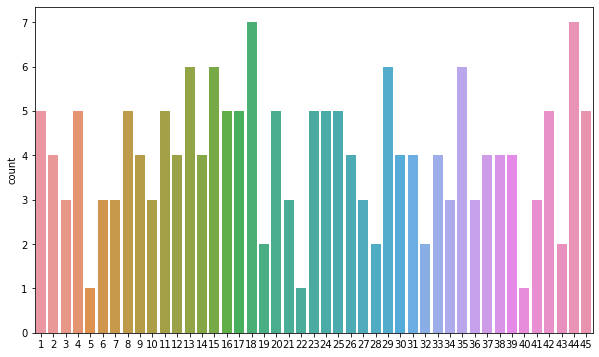

In [100]:
# 1~45 까지 몇번 나왔는지
plt.figure(figsize=(10,6))
sns.countplot(lot_list)

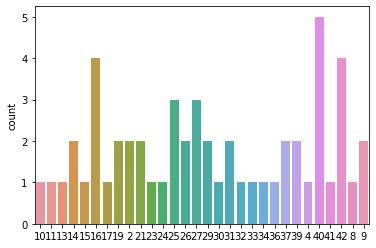

In [ ]:
# 데이터 시각화까지


In [ ]:
# 로또데이터 저장


In [ ]:
requests.codes.ok
# 100 우리 이런정보 내주는거야
# 200 성공
# 300 우리 이 사이트 이리루 이사했어 일루가
# 400 유저가 요청을 잘못한경우
# 500 서버 문제

200

In [ ]:
# 차단막는 코드
seed = np.random.randint(100)
np.random.seed(seed)
a = np.random.randint(5)
time.sleep(a)

## **네이버 키워드로 검색한 결과를 크롤링(속성 접근)**

키워드를 입력하세요 :세탁기
설치까지 완벽한 위닉스 세탁기건조기 환영해 https://blog.naver.com/dngusghk/222470214924
LG 트윈워시 드럼세탁기 분해 청소 비용, 가격 및 후기 https://blog.naver.com/aejiniyam/222473577816
드럼세탁기세탁조클리너 아직도 안써봄? https://blog.naver.com/marianne40/222503916107
김포세탁기청소 퀴퀴한 냄새 제거하기 https://blog.naver.com/totos1207/222478318008
세탁기통세척 이젠 상쾌한 향만~ https://cafe.naver.com/ungsangjang/414104
이사하시나요? 세탁기 냉장고등 가전이 필요하신가요? https://adcr.naver.com/adcr?x=+xSggTaUcCgQ0eFc2ofgF////w==knepf8CUnClIzu9/1nfMfX1Cj0F8ax5MpvwF6NX0olR8kW70YnxK+PuMJutWUKherYGsYTgLM0QRH/oYiHyDSQIIUR2dtqqWUXGKhnMiBhcPlzpm6wKLONbolvFw7Zs/dW8Vv/Kg3v7T4ssLONVvWunPUyq8feJTl3IpLizLcL8RATbwyfZFb+W9QgRIiHbp1Nx16Em3ZtCsxl5CO+pMi3HkcarL9Gcc87QLc0z3CGrIZ9OiIx4DaTzGYgGY9hNlP01mKSRUr+i/qnHzCExjXA51IJJPtlriGnjEkTD0oghW1atKcEWfl2lLgHd15A3Pwfr2zHJaZfeJpaw3m+ceAxIaOVJ5N4hqlbcvK+x9PAxhjCtOztg8hewYme/5cQpl1i3ADGUrwFnS4VQwTFg3ATugZsPeqs8mfTLomrG+W8oVgqD9bQnr2+9tcYDQZSyih84rQSugvGv1RtH070Kn0CPS5nHQ3PyCqFrtFR6fDmkGjUzo/j+80vluHQINcY8Eodo3naTeFQ4UwanD8v9mTF0gcFsghGbLloJvHbXL2ToN

    가져온 데이터에 접근을 하는 방식 자체는 판다스 색인처럼 결과값을 확인하며 진행하는 것이 가장 좋습니다.

#### 관심있는 개별종목의 시가총액, 외국인 소진률, PER, PBR 가져오기

In [ ]:
# url 정의

# requests 요청

# html 변환

# 시가총액, 외국인 소진률, PER, PBR


#### 여러 종목의 시가총액, 외국인 소진률, PER, PBR 한꺼번에 가져오기

In [ ]:
# 종목리스트 정의

# url 정의

# requests 요청

# html 변환

# 데이터 선별


005930 크롤링 중입니다.
002020 크롤링 중입니다.
323410 크롤링 중입니다.
크롤링 종료


[['462조6,581', '51.98%', '16.32', '1.92'],
 ['5,145', '11.36%', '3.64', '0.67'],
 ['32조2,118', '5.45%', '219.42', '9.55']]

In [ ]:
# 데이터프레임 제작


,시가총액,외국인소진률,PER,PBR
삼성전자,"462조6,581",51.98%,16.32,1.92
코오롱,"5,145",11.36%,3.64,0.67
카카오뱅크,"32조2,118",5.45%,219.42,9.55


## **동적페이지 크롤링**
> 최근에는 Js로 변경이 되며 일반적인 크롤링이 되지 않는 경우가 많음  
동적페이지와 숨겨진 url을 가져오는 방법을 알아봅니다

### 네이버 주식 시세 데이터 크롤링

In [ ]:
# 동적페이지의 숨은 URL
# 동적페이지에 요청을 할 때 웹 정책에 필요한 정보를 같이 전달을 해줘야 함.
# requests 요청시에 헤더정보 추가


,종가,전일비,시가,고가,저가,거래량
2021.09.27,"41,100",800,"40,250","41,450","40,100","79,654"
2021.09.24,"40,300","1,650","42,500","42,750","40,100","316,511"
2021.09.23,"41,950","2,050","42,700","43,800","41,700","335,625"
2021.09.17,"44,000","1,150","42,500","46,350","41,650","1,094,420"
2021.09.16,"42,850","3,000","40,200","42,850","39,400","514,556"
2021.09.15,"39,850","1,450","41,250","42,550","39,350","491,878"
2021.09.14,"41,300",200,"41,100","42,250","40,200","546,760"
2021.09.13,"41,500","3,750","44,850","45,800","41,200","1,164,685"
2021.09.10,"45,250","9,350","36,050","46,650","36,050","3,800,508"
2021.09.09,"35,900","1,700","34,700","36,600","34,550","511,021"


In [ ]:
# 콤마 제거

# 함수 적용

# 타입 변환

# 종가 그래프


### 20페이지 주가 정보 크롤링 해서 종가 그래프 출력

In [ ]:
# 헤더정보 정의

# 인덱스 정의


# 전체 가격 데이터

# requests 요청시에 헤더정보 추가

# html 변환

# 날짜 인덱스 살려서 활용하기

# 가격정보 추출

# 데이터프레임 제작


1페이지 크롤링 중
2페이지 크롤링 중
3페이지 크롤링 중
4페이지 크롤링 중
5페이지 크롤링 중
6페이지 크롤링 중
7페이지 크롤링 중
8페이지 크롤링 중
9페이지 크롤링 중
10페이지 크롤링 중
11페이지 크롤링 중
12페이지 크롤링 중
13페이지 크롤링 중
14페이지 크롤링 중
15페이지 크롤링 중
16페이지 크롤링 중
17페이지 크롤링 중
18페이지 크롤링 중
19페이지 크롤링 중
20페이지 크롤링 중


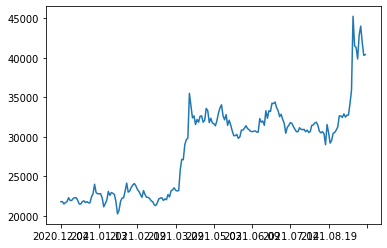

### 종목도 여러개 순환시키고 각 개별종목 데이터 csv 저장하는 연습

### 네이버 데이터랩 인기검색어 크롤링

In [ ]:
# json 데이터 파싱


'[{"message":null,"statusCode":200,"returnCode":0,"date":"2021/09/15","datetime":"2021.09.15.(수)","range":"","ranks":[{"rank":1,"keyword":"나이키운동화","linkId":"나이키운동화"},{"rank":2,"keyword":"크록스","linkId":"크록스"},{"rank":3,"keyword":"운동화","linkId":"운동화"},{"rank":4,"keyword":"모자","linkId":"모자"},{"rank":5,"keyword":"뉴발란스327","linkId":"뉴발란스327"},{"rank":6,"keyword":"나이키데이브레이크","linkId":"나이키데이브레이크"},{"rank":7,"keyword":"핸드폰가방","linkId":"핸드폰가방"},{"rank":8,"keyword":"나이키에어포스","linkId":"나이키에어포스"},{"rank":9,"keyword":"카드지갑","linkId":"카드지갑"},{"rank":10,"keyword":"gwf-a1000","linkId":"gwf-a1000"}]},{"message":null,"statusCode":200,"returnCode":0,"date":"2021/09/16","datetime":"2021.09.16.(목)","range":"","ranks":[{"rank":1,"keyword":"나이키운동화","linkId":"나이키운동화"},{"rank":2,"keyword":"크록스","linkId":"크록스"},{"rank":3,"keyword":"운동화","linkId":"운동화"},{"rank":4,"keyword":"모자","linkId":"모자"},{"rank":5,"keyword":"카드지갑","linkId":"카드지갑"},{"rank":6,"keyword":"뉴발란스327","linkId":"뉴발란스327"},{"rank":7,"keyword":"나이키에어포

### 다음 주식 일자별 주가 데이터 크롤링 연습

## 파파고 API

In [ ]:
papago()

번역이 필요한 한국어를 입력하세요 : 강의시작하겠습니다 카메라를 켜주시고 참석바랍니다.
Let's begin the lecture. Please turn on the camera and attend.


## 공공데이터 API

서울특별시 중구 퇴계로36길 10(필동2가 80-2)
서울특별시 중구 퇴계로34길 28(필동2가 84-1)
서울특별시 중구 퇴계로34길 28(필동2가 84-1)
서울특별시 중구 소월로 91(남대문로5가 471)
서울특별시 중구 장충동2가 산14-21
서울특별시 중구 남산공원길 125-72(예장동 산5-6)
서울특별시 중구 예장동 8-1
서울특별시 중구 예장동 8-1
서울특별시 중구 필동로1길 30(장충동2가 192-5)
서울특별시 중구 장충단로 72(장충동2가 201-6)
